In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
import statsmodels.tsa.api as smtsa  

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
def plotds(xt, nlag=30, fig_size=(12, 10)):
    if not isinstance(xt, pd.Series):
         xt = pd.Series(xt)
    plt.figure(figsize=fig_size)
    layout = (2, 2)
    
    ax_xt = plt.subplot2grid(layout, (0, 0), colspan=2)
    ax_acf= plt.subplot2grid(layout, (1, 0))
    ax_pacf = plt.subplot2grid(layout, (1, 1))
    
    xt.plot(ax=ax_xt)
    ax_xt.set_title('Time Series')
    plot_acf(xt, lags=50, ax=ax_acf)        
    plot_pacf(xt, lags=50, ax=ax_pacf)
    plt.tight_layout()
    return None

In [3]:
n = 600

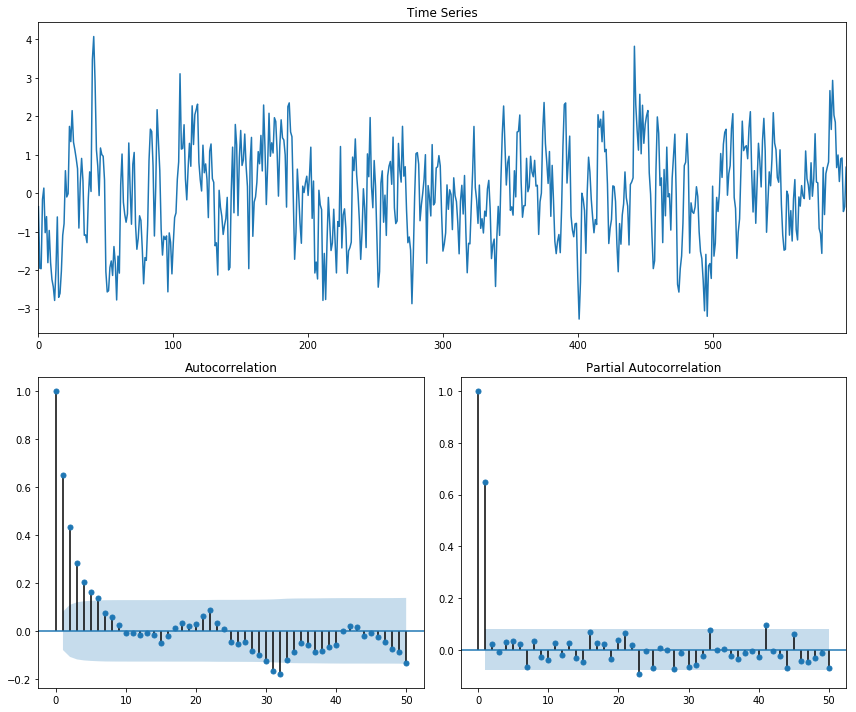

In [4]:
ar = np.r_[1, -0.6]
ma = np.r_[1, 0]
ar1_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
plotds(ar1_data)

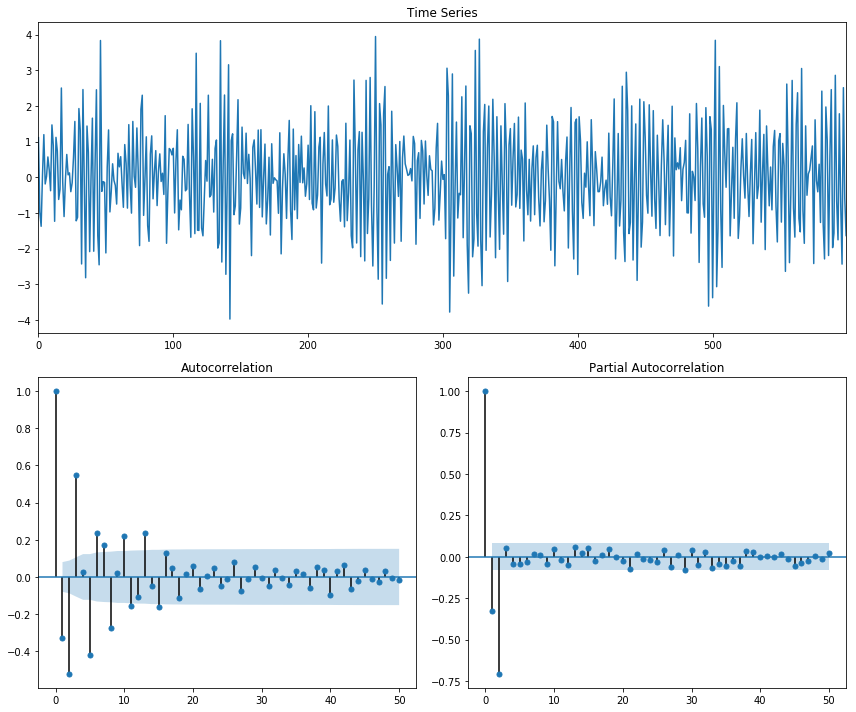

In [5]:
ar = np.r_[1, 0.6, 0.7]
ma = np.r_[1, 0]
ar2_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
plotds(ar2_data)

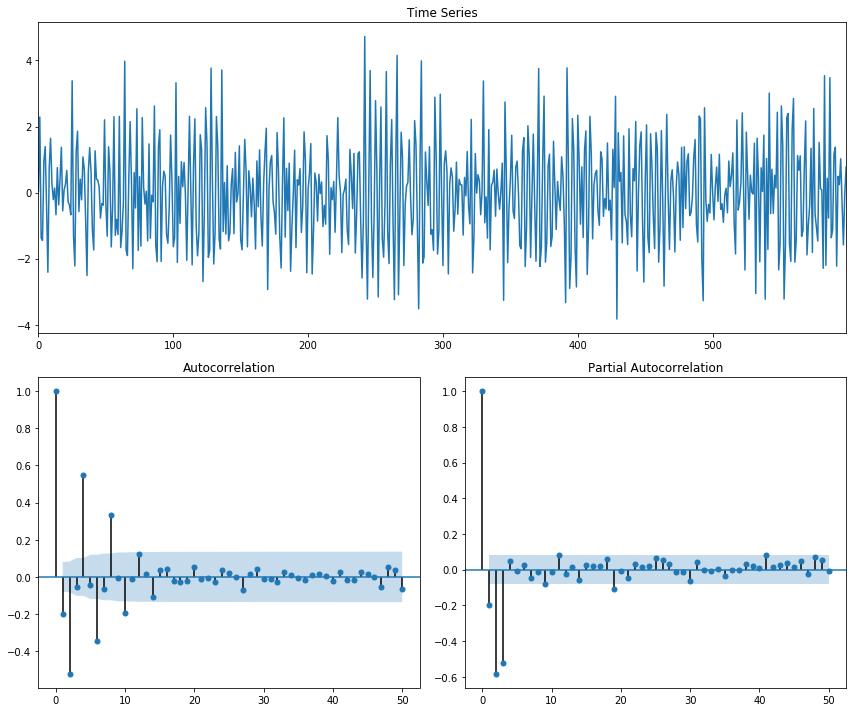

In [6]:
ar = np.r_[1, 0.6, 0.7, 0.5]
ma = np.r_[1, 0]
ar3_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
plotds(ar3_data)

In [7]:
ar1model = smtsa.ARMA(ar1_data.tolist(), order=(1, 0))
ar1=ar1model.fit(maxlag=30, method='mle', trend='nc')
ar1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:                     ARMA(1, 0)   Log Likelihood                -823.266
Method:                           mle   S.D. of innovations              0.954
Date:                Fri, 08 Dec 2017   AIC                           1650.532
Time:                        13:03:34   BIC                           1659.326
Sample:                             0   HQIC                          1653.956
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        0.6485      0.031     20.927      0.000       0.588       0.709
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.5419           +0.0000j            1.5419            0.0000
-----------------------------------------------------------------------------
"""

In [8]:
ar3 = smtsa.ARMA(ar3_data.tolist(), order=(3, 0)).fit(
    maxlag=30, method='mle', trend='nc')
ar3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:                     ARMA(3, 0)   Log Likelihood                -868.570
Method:                           mle   S.D. of innovations              1.028
Date:                Fri, 08 Dec 2017   AIC                           1745.139
Time:                        13:04:42   BIC                           1762.727
Sample:                             0   HQIC                          1751.986
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y       -0.6186      0.035    -17.829      0.000      -0.687      -0.551
ar.L2.y       -0.7466      0.030    -24.795      0.000      -0.806      -0.688
ar.L3.y       -0.5253      0.035    -15.151      0.000      -0.593      -0.457
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.0339           -1.1302j            1.1307           -0.2452
AR.2            0.0339           +1.1302j            1.1307            0.2452
AR.3           -1.4890           -0.0000j            1.4890           -0.5000
-----------------------------------------------------------------------------
"""